In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) 


y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0}) #change binary labels 'M' to 1 and 'B' to 0


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

C:\Users\unaiz\AppData\Local\Temp\ipykernel_16968\2628873864.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0}) #change binary labels 'M' to 1 and 'B' to 0


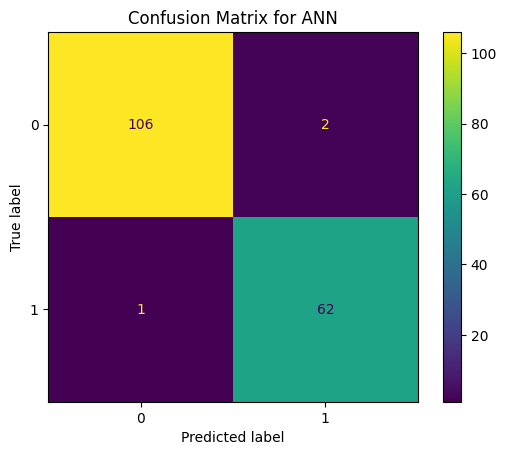

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

0.9828042328042329
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

0.9828042328042329
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96   

In [5]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))  # 30 features
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, np.ravel(y_train), epochs=100, batch_size=10, verbose=1)

y_pred_whole = (model.predict(X_test) > 0.5).astype("int32")  # Apply threshold
'''


from sklearn import neural_network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

model = neural_network.MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000)
model.fit(X_train,np.ravel(y_train))

from sklearn.metrics import classification_report, roc_auc_score

y_pred_whole = model.predict(X_test)
#print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))

# Generate confusion matrix
cm_whole = confusion_matrix(y_test, y_pred_whole)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_whole, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix for ANN")
plt.show()




from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)  # Choose top 10 features
X_train_selected = selector.fit_transform(X_train, np.ravel(y_train))
X_test_selected = selector.transform(X_test)

model_univariate = neural_network.MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000)
model_univariate.fit(X_train_selected,np.ravel(y_train))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
y_pred_univariate = model_univariate.predict(X_test_selected)
cm_univariate = confusion_matrix(y_test, y_pred_univariate)





from sklearn.feature_selection import mutual_info_classif
import pandas as pd
mi = mutual_info_classif(X_train, np.ravel(y_train))

# Sort the features based on MI scores
mi_scores = pd.Series(mi, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Select top 10 features
top_features = mi_scores.index[:10]  # Select the top 10 based on MI

# Reduce the training and testing sets to these features
df_aux_train = pd.DataFrame(X_train, columns=X.columns.to_list())
df_aux_train_top = df_aux_train[top_features]
X_train_top = df_aux_train_top.to_numpy()

df_aux_test = pd.DataFrame(X_test, columns=X.columns.to_list())
df_aux_test_top = df_aux_test[top_features]
X_test_top = df_aux_test_top.to_numpy()

model_mi = neural_network.MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000)
model_mi.fit(X_train_top,np.ravel(y_train))

# Generate confusion matrix
y_pred_mi = model_mi.predict(X_test_top)
cm_mi = confusion_matrix(y_test, y_pred_mi)






from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10) #MLPClassifier does not have feature_importance
X_train_rfe = rfe.fit_transform(X_train, np.ravel(y_train))
X_test_rfe = rfe.transform(X_test)

model_rfe = neural_network.MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000)
model_rfe.fit(X_train_rfe,np.ravel(y_train))


# Generate confusion matrix
y_pred_rfe = model_rfe.predict(X_test_rfe)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)


print(classification_report(y_test, y_pred_whole))
print(roc_auc_score(y_test, y_pred_whole))

print(classification_report(y_test, y_pred_univariate))
print(roc_auc_score(y_test, y_pred_whole))

print(classification_report(y_test, y_pred_mi))
print(roc_auc_score(y_test, y_pred_whole))

print(classification_report(y_test, y_pred_rfe))
print(roc_auc_score(y_test, y_pred_whole))


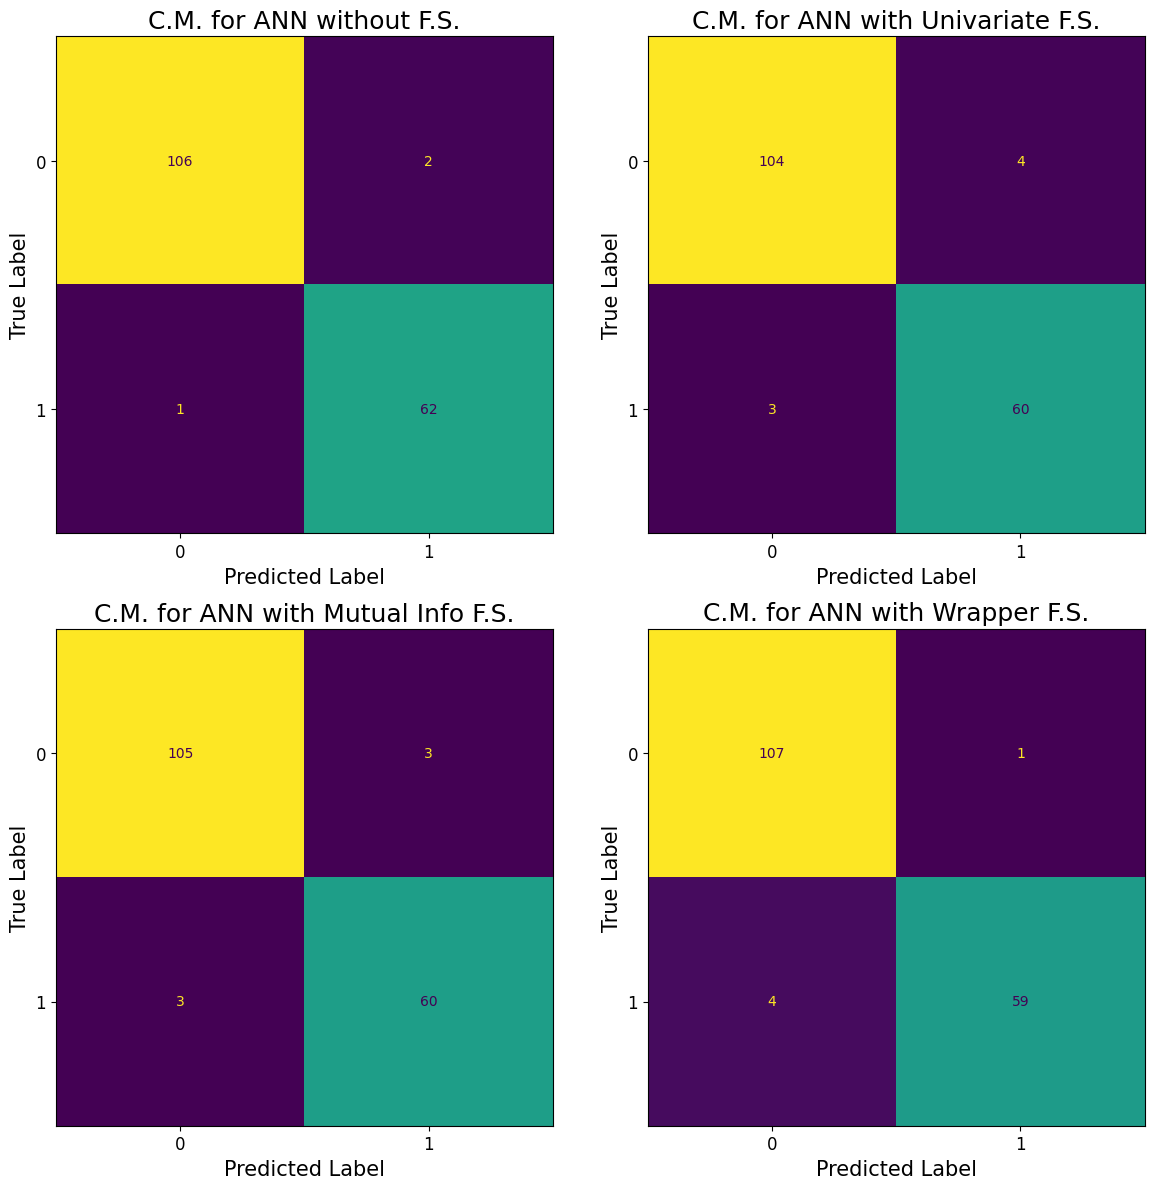

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid of plots with increased figure size

# Plot each confusion matrix on a separate subplot with larger font sizes
ConfusionMatrixDisplay(confusion_matrix=cm_whole).plot(ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title("C.M. for ANN without F.S.", fontsize=18)
axes[0, 0].set_xlabel("Predicted Label", fontsize=15)
axes[0, 0].set_ylabel("True Label", fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=12)  # Increase tick label font size

ConfusionMatrixDisplay(confusion_matrix=cm_univariate).plot(ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title("C.M. for ANN with Univariate F.S.", fontsize=18)
axes[0, 1].set_xlabel("Predicted Label", fontsize=15)
axes[0, 1].set_ylabel("True Label", fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=12)

ConfusionMatrixDisplay(confusion_matrix=cm_mi).plot(ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title("C.M. for ANN with Mutual Info F.S.", fontsize=18)
axes[1, 0].set_xlabel("Predicted Label", fontsize=15)
axes[1, 0].set_ylabel("True Label", fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=12)

ConfusionMatrixDisplay(confusion_matrix=cm_rfe).plot(ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title("C.M. for ANN with Wrapper F.S.", fontsize=18)
axes[1, 1].set_xlabel("Predicted Label", fontsize=15)
axes[1, 1].set_ylabel("True Label", fontsize=15)
axes[1, 1].tick_params(axis='both', labelsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


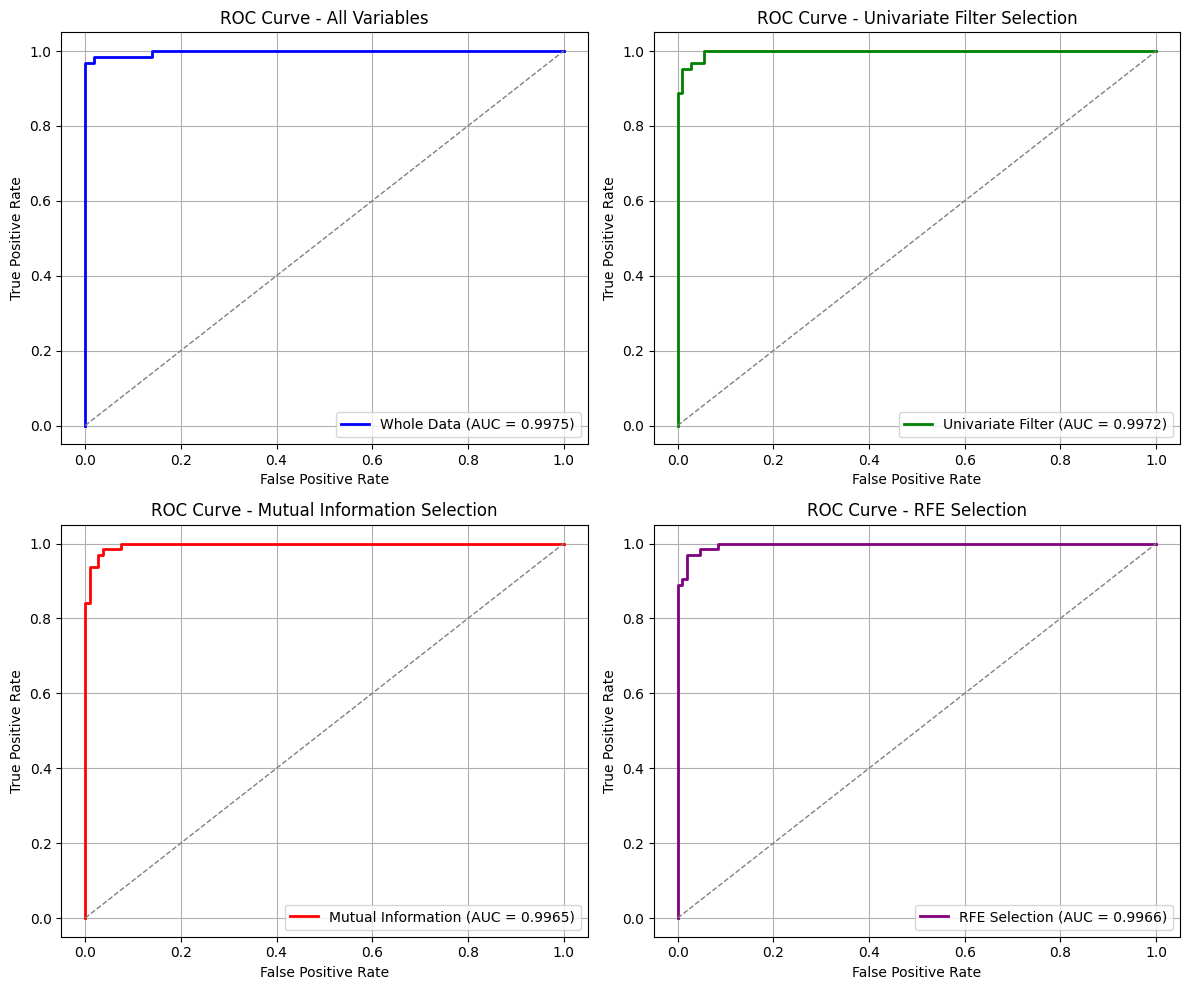

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability estimates for the positive class (e.g., class 1 for a binary classifier)
y_prob_whole = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
y_prob_univariate = model_univariate.predict_proba(X_test_selected)[:, 1]
y_prob_mi = model_mi.predict_proba(X_test_top)[:, 1]
y_prob_rfe = model_rfe.predict_proba(X_test_rfe)[:, 1]



# Compute ROC curve and AUC
fpr_whole, tpr_whole, thresholds_whole = roc_curve(y_test, y_prob_whole, pos_label=1)  # Adjust pos_label if necessary
fpr_univariate, tpr_univariate, thresholds_univariate = roc_curve(y_test, y_prob_univariate, pos_label=1)
fpr_mi, tpr_mi, thresholds_mi = roc_curve(y_test, y_prob_mi, pos_label=1)
fpr_rfe, tpr_rfe, thresholds_rfe = roc_curve(y_test, y_prob_rfe, pos_label=1)

roc_auc_whole = auc(fpr_whole, tpr_whole)
roc_auc_univariate = auc(fpr_univariate, tpr_univariate)
roc_auc_mi = auc(fpr_mi, tpr_mi)
roc_auc_rfe = auc(fpr_rfe, tpr_rfe)


# Plotting all ROC curves in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# First subplot: ROC curve for the whole dataset
axes[0, 0].plot(fpr_whole, tpr_whole, color='blue', lw=2, label=f"Whole Data (AUC = {roc_auc_whole:.4f})")
axes[0, 0].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[0, 0].set_title("ROC Curve - All Variables")
axes[0, 0].set_xlabel("False Positive Rate")
axes[0, 0].set_ylabel("True Positive Rate")
axes[0, 0].legend(loc="lower right")
axes[0, 0].grid()

# Second subplot: ROC curve for univariate filter selection
axes[0, 1].plot(fpr_univariate, tpr_univariate, color='green', lw=2, label=f"Univariate Filter (AUC = {roc_auc_univariate:.4f})")
axes[0, 1].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[0, 1].set_title("ROC Curve - Univariate Filter Selection")
axes[0, 1].set_xlabel("False Positive Rate")
axes[0, 1].set_ylabel("True Positive Rate")
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid()

# Third subplot: ROC curve for mutual information selection
axes[1, 0].plot(fpr_mi, tpr_mi, color='red', lw=2, label=f"Mutual Information (AUC = {roc_auc_mi:.4f})")
axes[1, 0].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[1, 0].set_title("ROC Curve - Mutual Information Selection")
axes[1, 0].set_xlabel("False Positive Rate")
axes[1, 0].set_ylabel("True Positive Rate")
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid()

# Fourth subplot: ROC curve for RFE selection
axes[1, 1].plot(fpr_rfe, tpr_rfe, color='purple', lw=2, label=f"RFE Selection (AUC = {roc_auc_rfe:.4f})")
axes[1, 1].plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
axes[1, 1].set_title("ROC Curve - RFE Selection")
axes[1, 1].set_xlabel("False Positive Rate")
axes[1, 1].set_ylabel("True Positive Rate")
axes[1, 1].legend(loc="lower right")
axes[1, 1].grid()

# Adjust layout
plt.tight_layout()
plt.show()
